# Task 3:  Forecast Future Market Trends

In [1]:
# import libraries and and configurations
import sys, os
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import importlib
import task3_forecasting
importlib.reload(task3_forecasting)

2025-08-14 20:42:54.242512: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-14 20:42:54.247805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-14 20:42:54.264082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755193374.287701   31781 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755193374.296046   31781 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755193374.315676   31781 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<module 'task3_forecasting' from '/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/task3_forecasting.py'>

#### Import Data

In [2]:
import pandas as pd
from task3_forecasting import (
    load_arima, forecast_future_arima, plot_future_forecast_arima,
    load_lstm_and_scaler, forecast_future_lstm, plot_future_forecast_lstm
)

# Load your historical TSLA prices (same as Task 2)
tsla = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"], index_col="Date")["Close"].dropna().sort_index()

# Choose forecast horizon: ~6 months ≈ 126 business days, 12 months ≈ 252
STEPS_6M = 126
STEPS_12M = 252


#### ARIMA – Load & Forecast

/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


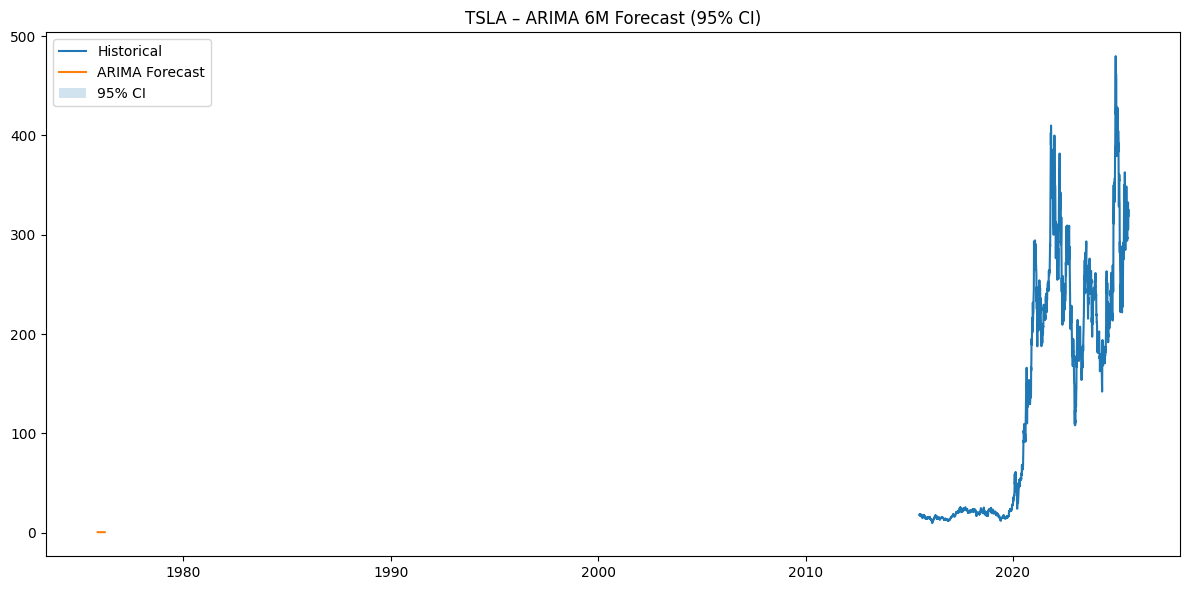

/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


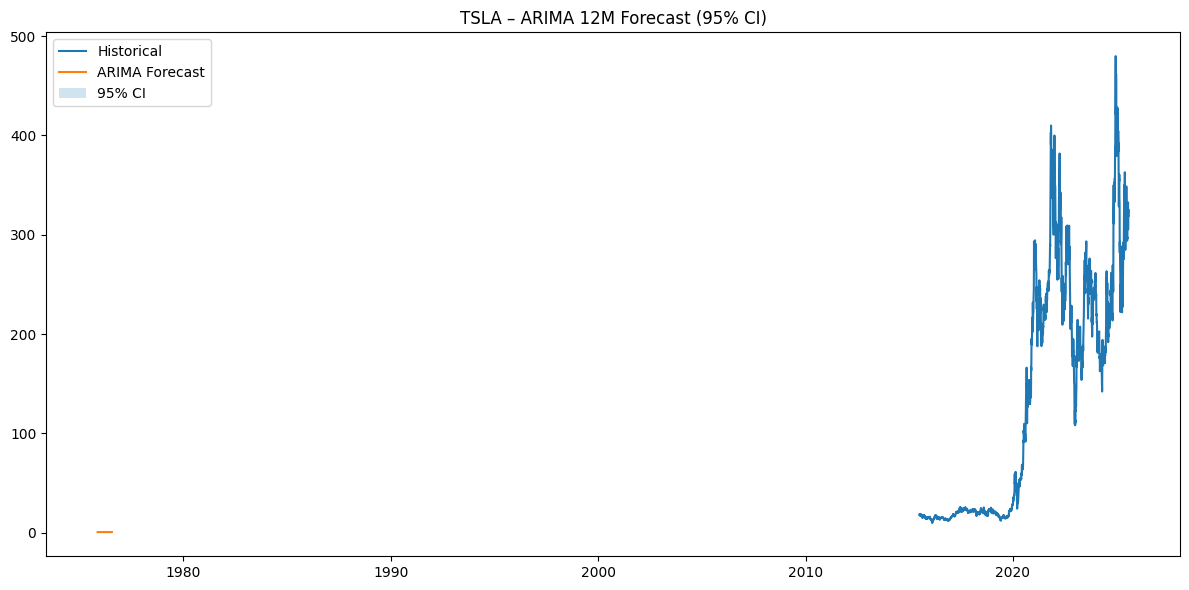

In [3]:
# Load saved ARIMA model
arima_model = load_arima("../model/arima_model.pkl")

# Forecast 6 months
fc_arima_6m = forecast_future_arima(arima_model, steps=STEPS_6M)
plot_future_forecast_arima(tsla, fc_arima_6m, title="TSLA – ARIMA 6M Forecast (95% CI)")

# Forecast 12 months (optional)
fc_arima_12m = forecast_future_arima(arima_model, steps=STEPS_12M)
plot_future_forecast_arima(tsla, fc_arima_12m, title="TSLA – ARIMA 12M Forecast (95% CI)")


#### LSTM – Load & Forecast

2025-08-14 20:43:00.379142: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


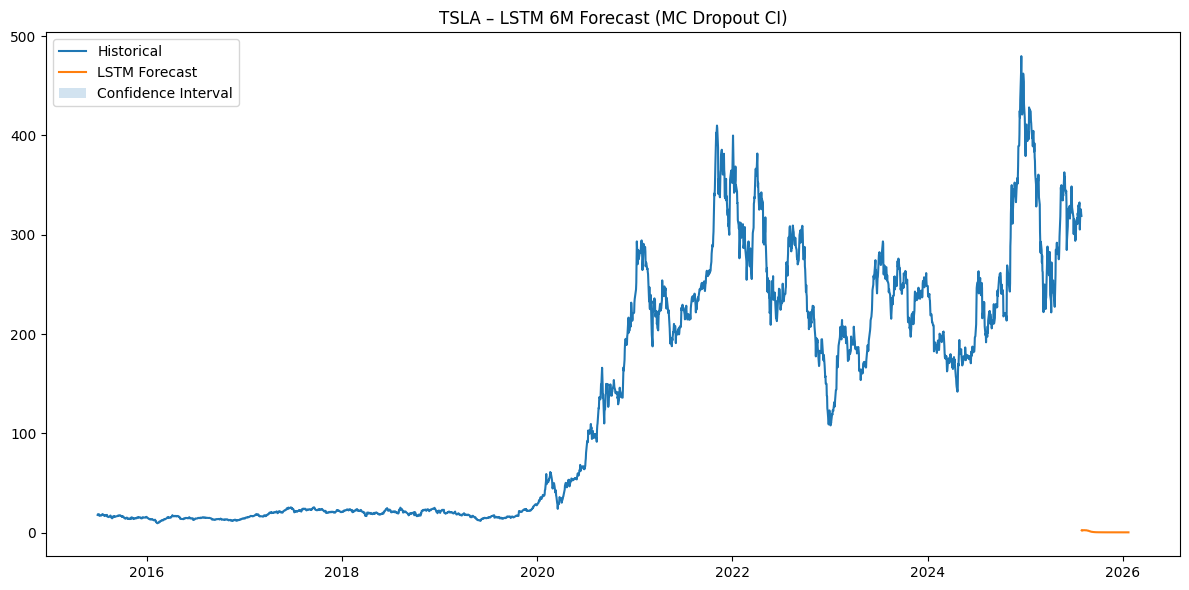

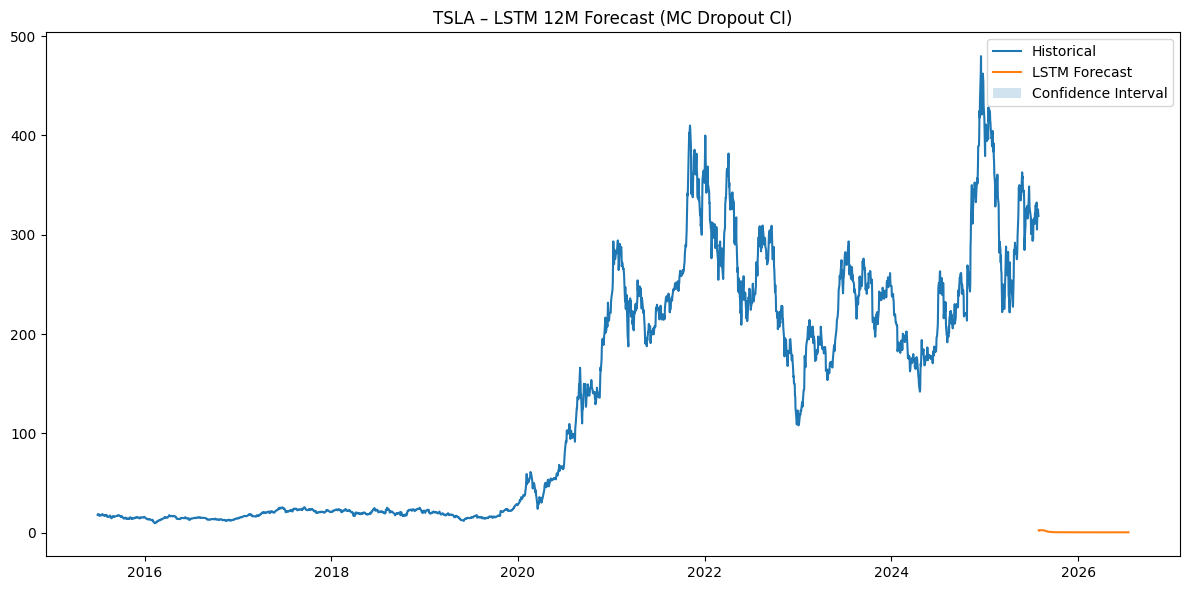

In [4]:
# Load saved LSTM model + scaler
lstm_model, lstm_scaler = load_lstm_and_scaler("../model/lstm_tsla.h5", "../model/lstm_scaler.save")

# MC Dropout (preferred for CI): pass use_mc_dropout=True
fc_lstm_6m = forecast_future_lstm(
    hist_series=tsla, model=lstm_model, scaler=lstm_scaler,
    lookback=60, steps=STEPS_6M, use_mc_dropout=True, mc_passes=50
)
plot_future_forecast_lstm(tsla, fc_lstm_6m, title="TSLA – LSTM 6M Forecast (MC Dropout CI)")

# 12 months (optional)
fc_lstm_12m = forecast_future_lstm(
    hist_series=tsla, model=lstm_model, scaler=lstm_scaler,
    lookback=60, steps=STEPS_12M, use_mc_dropout=True, mc_passes=50
)
plot_future_forecast_lstm(tsla, fc_lstm_12m, title="TSLA – LSTM 12M Forecast (MC Dropout CI)")


In [6]:
fc_lstm_6m.to_csv("../model/tsla_future_forecast.csv", index=False)